# FF Convergence

In [7]:
import sys
sys.path.insert(0, '../../../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import tensorflow as tf
import random
import pickle as pkl

from qiskit.quantum_info import Operator, Statevector, random_unitary
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from quantum_circuits import integrable_circuit, nonintegrable_circuit
from quantum_tools import circuit_to_matrix, partial_trace
from kraus_channels import isomery_to_kraus, KrausMap
from quantum_channel import ConcatChannel, DilutedChannel, IdentityChannel, ChoiMapStatic, channel_fidelity
from utils import numberToBase, kron, saver, loader
from spectrum import complex_spacing_ratio, channel_spectrum, Spectrum, mean_spacing, coat_spectrum
from analysis import spectrum_to_angular, spectrum_to_radial, hist_ensamble
from qiskit.circuit.library import iSwapGate, XGate, YGate, HGate, CXGate, RGate, RZGate

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=1)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


## Circuits

In [8]:
def sample_AI_csr(n, n_anc, reps, circuit_type, L):
    map_list = []
    spectra_list = []
    csr_list = []


    for i in tqdm(range(reps)):
        np.random.seed(42 + i)
        circuit = circuit_type(n+n_anc, L)
        U = Operator(circuit).data

        kraus_map = isomery_to_kraus(U, rank = 2**n_anc)
        map_list.append(kraus_map)
        
        spectrum = channel_spectrum(kraus_map)
        spectra_list.append(spectrum)
        csr = complex_spacing_ratio(spectrum, log=False)
        csr_list.append(csr)

    return  map_list, spectra_list, csr_list

def stats(radial_list, angular_list):
    # stack list

    radial = np.concatenate(radial_list)
    
    print(radial.shape)
    angular = np.concatenate(angular_list)
    N = len(radial)
    
    r_mean = np.mean(radial)
    a_mean = -np.mean(np.cos(angular))

    r_std = np.std(radial)/np.sqrt(N)
    a_std = np.std(np.cos(angular))/np.sqrt(N)

    return r_mean, r_std, a_mean, a_std

In [25]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 100

L = 5

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")

models = 10*loader("../models/integrable_model_4_L=5.model")

csr_model_list = []
csr_FF_list = []
for i, (model, map_FF) in enumerate(zip(models, maps_FF_list)):
    map_model = model.channel
    
    spectrum_FF = channel_spectrum(map_FF)
    spectrum_model = channel_spectrum(map_model)

    #spectrum_FF.plot_circle()
    #spectrum_FF.plot()
    #spectrum_model.plot()
    #plt.show()

    csr_model = complex_spacing_ratio(spectrum_model, log=False)
    csr_FF = complex_spacing_ratio(spectrum_FF, log=False)

    csr_model_list.append(csr_model)
    csr_FF_list.append(csr_FF)

    #csr_FF.plot_circle()
    #csr_model.plot()
    #csr_FF.plot()
    #plt.show()

    #print(channel_fidelity(map_FF, map_model))


  0%|          | 0/100 [00:00<?, ?it/s]

(20388,)


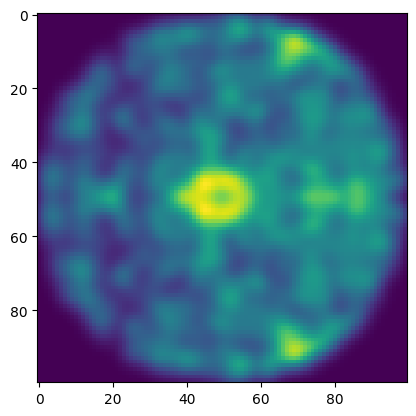

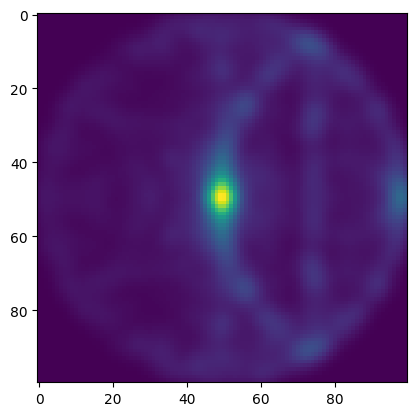

In [27]:
csr_model = Spectrum(csr_model_list)
csr_model_coat = coat_spectrum(csr_model, sigma=0.05)

plt.imshow(csr_model_coat)
plt.show()

csr_FF = Spectrum(csr_FF_list)
csr_FF_coat = coat_spectrum(csr_FF, sigma=0.05)

plt.imshow(csr_FF_coat)
plt.show()


In [18]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 10

L = 10

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")


  0%|          | 0/10 [00:00<?, ?it/s]

(2138,)


In [19]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 10

L = 20

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")


  0%|          | 0/10 [00:00<?, ?it/s]

(2216,)


In [20]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 10

L = 30

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")


  0%|          | 0/10 [00:00<?, ?it/s]

(2202,)


In [21]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 10

L = 40

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")


  0%|          | 0/10 [00:00<?, ?it/s]

(2196,)


In [22]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 4
n_anc = 1
d = 2**n
reps = 10

L = 50

maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)
saver(csr_FF_list, f"data/FF_L={L}_list.pkl")

radial = spectrum_to_radial(csr_FF_list)
angular = spectrum_to_angular(csr_FF_list)

r_mean_FF, r_std_FF, a_mean_FF, a_std_FF = stats(radial, angular)
saver([r_mean_FF, r_std_FF, a_mean_FF, a_std_FF], f"data/FF_L={L}_stats.pkl")


  0%|          | 0/10 [00:00<?, ?it/s]

(2268,)


## Save Super operators of Ideals

In [23]:
def save_superoperator(L):
    n = 4
    n_anc = 1
    d = 2**n
    reps = 10

    maps_FF_list, spectra_FF_list, csr_FF_list = sample_AI_csr(n, n_anc, reps, integrable_circuit, L)

    for i, map_FF in enumerate(maps_FF_list):
         SO = map_FF.superoperator
         np.savetxt(f'data/superoperator/superoperator_L={L}_ideal/superoperator{i}', SO, fmt='%f')

In [24]:
save_superoperator(L=5)
save_superoperator(L=10)
save_superoperator(L=20)
save_superoperator(L=30)
save_superoperator(L=40)
save_superoperator(L=50)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]